In [9]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

In [38]:
data=pd.read_csv("C:/Users/Sneha/Desktop/Datasets/sales_data.csv")

In [39]:
#On education
data.replace('0. <HS', 'dropout', inplace=True)
data.replace('1. HS', 'hs', inplace=True)
data.replace('2. Some College', 'associates', inplace=True)
data.replace('3. Bach', 'bachelors', inplace=True)
data.replace('4. Grad', 'masters', inplace=True)
#On age
data.replace('1_Unk', 'Unknown', inplace=True)
data.replace('2_<=25', '0-25', inplace=True)
data.replace('3_<=35', '25-35', inplace=True)
data.replace('4_<=45', '35-45', inplace=True)
data.replace('5_<=55', '45-55', inplace=True)
data.replace('6_<=65', '55-65', inplace=True)
data.replace('7_>65', '>65', inplace=True)
#On mortgage
data.replace('1Low', 'low', inplace=True)
data.replace('2Med', 'medium', inplace=True)
data.replace('3High', 'high', inplace=True)
#On child
data.replace('U', 'None', inplace=True)
data.replace('0', 'None', inplace=True)
#On gender
data.replace('U', 'Unknown', inplace=True)
#Car_prob
data['car_prob']=data['car_prob'].replace(to_replace=1,value=1.0)
data['car_prob']=data['car_prob'].replace(to_replace=2,value=.9)
data['car_prob']=data['car_prob'].replace(to_replace=3,value=.8)
data['car_prob']=data['car_prob'].replace(to_replace=4,value=.7)
data['car_prob']=data['car_prob'].replace(to_replace=5,value=.6)
data['car_prob']=data['car_prob'].replace(to_replace=6,value=.5)
data['car_prob']=data['car_prob'].replace(to_replace=7,value=.4)
data['car_prob']=data['car_prob'].replace(to_replace=8,value=.3)
data['car_prob']=data['car_prob'].replace(to_replace=9,value=.2)
data['car_prob']=data['car_prob'].replace(to_replace=0,value=.1)

In [43]:
data['education'].fillna('None', inplace=True)
data['marriage'].fillna('Unmarried', inplace=True)
data['house_owner'].fillna('Homeless', inplace=True)

In [44]:
data.isnull().sum()/len(data)*100

flag            0.0
gender          0.0
education       0.0
house_val       0.0
age             0.0
online          0.0
customer_psy    0.0
marriage        0.0
child           0.0
occupation      0.0
mortgage        0.0
house_owner     0.0
region          0.0
car_prob        0.0
fam_income      0.0
dtype: float64

In [45]:
X = data.drop(columns='flag')
y = data['flag']

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y= le.fit_transform(y)

In [48]:
X = pd.get_dummies(X,drop_first=True)

In [49]:
scalar=MinMaxScaler(feature_range=(0,1))
X=scalar.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [51]:
y.shape

(40000,)

In [53]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28000, 55)
(12000, 55)
(28000,)
(12000,)


In [54]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=55))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [55]:
model.compile(Adam(lr=.001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [83]:
model_info=model.fit(X_train,y_train,batch_size=100,epochs=200)

Epoch 1/200
28000/28000 [==============================] - 2s 55us/step - loss: 0.5727 - accuracy: 0.7060
Epoch 2/200
28000/28000 [==============================] - 1s 53us/step - loss: 0.5741 - accuracy: 0.7040
Epoch 3/200
28000/28000 [==============================] - 2s 57us/step - loss: 0.5748 - accuracy: 0.7060
Epoch 4/200
28000/28000 [==============================] - 2s 56us/step - loss: 0.5742 - accuracy: 0.7065
Epoch 5/200
28000/28000 [==============================] - 1s 49us/step - loss: 0.5721 - accuracy: 0.7084
Epoch 6/200
28000/28000 [==============================] - 1s 50us/step - loss: 0.5731 - accuracy: 0.7071
Epoch 7/200
28000/28000 [==============================] - 1s 51us/step - loss: 0.5739 - accuracy: 0.7044
Epoch 8/200
28000/28000 [==============================] - 1s 50us/step - loss: 0.5718 - accuracy: 0.7065
Epoch 9/200
28000/28000 [==============================] - 1s 51us/step - loss: 0.5713 - accuracy: 0.7053
Epoch 10/200
28000/28000 [====================

In [84]:
scores=model.evaluate(X_test,y_test,batch_size=100)
print("\n%s:%.2f%%" % (model_.metrics_names[1],scores[1]*100))

12000/12000 [==============================] - 0s 36us/step

accuracy:68.58%


In [124]:
y_pred=model.predict(X_test,batch_size=100)

In [68]:
#import tensorflow as tf
from keras import metrics
accu=keras.metrics.binary_accuracy(y_test, y_pred)

In [104]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    #for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train'], loc='best')
    # for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train'], loc='best')
    plt.show()

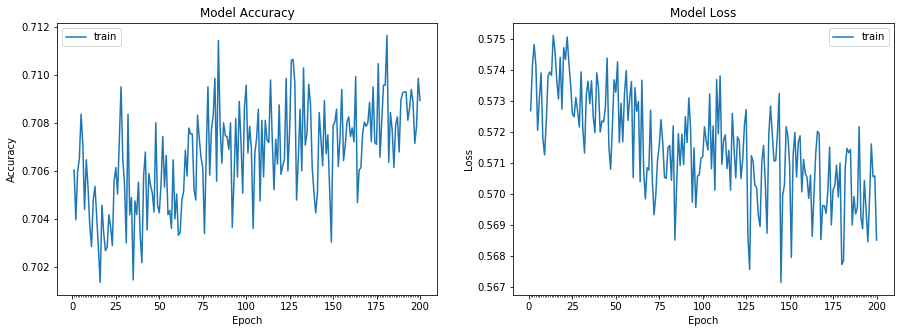

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_model_history(model_info)

In [117]:
a=model_info.history['accuracy']
a_=np.max(a)
print('model_accuracy: %.2f' % a_)

model_accuracy: 0.71


In [118]:
b=model_info.history['loss']
b_=np.min(b)
print("model_loss: %.2f" % b_)

model_loss: 0.57


In [130]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test,batch_size=100)
#y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred,axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67      5951
           1       0.68      0.72      0.70      6049

    accuracy                           0.69     12000
   macro avg       0.69      0.69      0.69     12000
weighted avg       0.69      0.69      0.69     12000

